# set up and imports
## imports

In [177]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
import math

In [178]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/' 

# iv2

## load data for iv2

In [179]:
df = pd.read_pickle('/home/earthquakes1/homes/Rebecca/phd/data/results_database/eq_object_1s_bandpass_01_19_snr_20_blank_025_new')

In [180]:
df

,level_0,index,eq_id,eq_mag,eq_mag_type,eq_time,eq_loc,tp_max,tp_max_stations,tc,tc_stations,iv2,iv2_distances,iv2_stations
0,0,0,1954144,5.00,MW,20050106_101442,"(51.4038, -174.2004, 40.9)",[2.703469772847614],[AK.ATKA.],[1.788098292852997],[AK.ATKA.],[2.459757543302516e-10],[88.7662128415884 km],[AK.ATKA.]
1,1,0,1950504,5.20,ML,20050105_125811,"(-37.7811, 176.4377, 222.3)",[],[],[0.5198431363611687],[NZ.TOZ.10],[],[],[]
2,2,0,1976290,5.40,MW,20050211_210022,"(60.1779, -139.4573, 14.8)",[0.7325509436379803],[AK.PNL.],[2.691802158263137],[AK.PNL.],[1.1162505460712965e-07],[57.00566502821768 km],[AK.PNL.]
3,3,0,1947713,5.00,MW,20050204_091538,"(-37.922, -73.3985, 22.8)","[0.3637637309535463, 0.22315873726492275, 0.23...","[ZW.A401., ZW.A402., ZW.A403., ZW.A406., ZW.A4...","[0.3654982110985966, 0.18644033660175346, 0.35...","[ZW.A401., ZW.A402., ZW.A403., ZW.A404., ZW.A4...","[5.111004832300011e-10, 3.893247058739225e-06,...","[46.52436835522224 km, 45.99021789372439 km, 3...","[ZW.A401., ZW.A402., ZW.A403., ZW.A404., ZW.A4..."
4,4,0,1939434,5.10,mb,20050302_111256,"(34.7605, -111.0293, 5.0)","[0.41186893776607814, 0.27159234244794817, 0.2...","[XL.KNTH.00, XL.PFNP.00, US.WUAZ.]","[0.6905106679214968, 2.6043681649461017, 1.105...","[XL.KNTH.00, XL.PFNP.00, US.WUAZ.]","[8.305804343675582e-09, 6.425156264450742e-11,...","[52.216691332797225 km, 107.48792283304662 km,...","[XL.KNTH.00, XL.PFNP.00, US.WUAZ.]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,4537,0,11139830,3.55,Mw,20191101_093317,"(36.568833, -117.976, 10.79)","[0.5086450916541208, 0.5597845307347287, 0.208...","[CI.CCA., CI.CCC., CI.CGO., CI.CWC., CI.DAW., ...","[0.8387364736348268, 0.28777354579586545, 0.42...","[CI.AVM., GS.CA03.00, GS.CA04.00, GS.CA05.00, ...","[6.1062598840537e-11, 1.0330295915407248e-11, ...","[111.26337047752858 km, 126.67259288586504 km,...","[GS.CA03.00, GS.CA04.00, GS.CA05.00, GS.CA06.0..."
7994,4538,0,11139801,3.20,ML,20191101_070002,"(39.137, -119.6248, 8.2)","[0.13255946617821734, 0.10199727444384013, 0.1...","[NN.PAH., NN.PNT., NN.TBRD., NN.WAK., BK.WELL.00]","[0.21969372853925825, 3.569238851323347, 0.921...","[NN.BEK., NN.CMK6., BK.JEPS.00, NN.LHV., IM.NV...","[7.642932047780975e-12, 1.477168870505672e-12,...","[102.7414962154417 km, 138.41551138323055 km, ...","[NN.BEK., NN.LHV., IM.NV31., BK.ORV.00, NN.PAH..."
7995,4539,0,11139792,4.90,mb,20191101_060756,"(6.7486, 125.0659, 10.0)",[0.8938804757791863],[IU.DAV.00],[1.4028758613510954],[IU.DAV.00],[9.815209341727072e-09],[66.91647188871902 km],[IU.DAV.00]
7996,4540,0,11139785,4.70,Mww,20191101_052545,"(40.5178, 20.8117, 13.69)","[0.725295600255241, 0.6455558080947313, 0.3518...","[HT.IGT., HL.JAN., AC.KBN., HL.KZN., HT.NEST.,...","[1.8245770328694262, 0.7132940311897502, 1.002...","[HT.IGT., HL.JAN., AC.KBN., HL.KZN., HT.NEST.,...","[1.711491362397526e-10, 3.834446632505303e-10,...","[116.98151888241351 km, 95.72545937963437 km, ...","[HT.IGT., HL.JAN., AC.KBN., HL.KZN., HT.NEST.,..."


In [183]:
list_iv2_all = list(df.iv2)
list_mag_all = list(df.eq_mag)
list_dist_Distance = list(df.iv2_distances)
list_dist = []
list_mag = []
list_iv2 = []
eq = 0
for m in range(0, len(list_mag_all)):
    if list_mag_all[m]>5:
        someTrue = len(list_iv2_all[m])
        for d in range(0, len(list_dist_Distance[m])):
            if list_iv2_all[m][d] != None:
                list_mag.append(list_mag_all[m])
                list_iv2.append(list_iv2_all[m][d])
                list_dist.append(float(str(np.array(list_dist_Distance[m][d]))[:-3]))
            else:
                someTrue -= 1
        if someTrue >0:
            eq += 1
        
        

In [184]:
eq

2481

## iv2 calculations

### correct for distances
all these distances are epicentral

#### using $r^2$

In [169]:
dist_corr_mult = (np.array(list_dist)**2)*np.array(list_iv2)
df  = pd.DataFrame({'iv2':np.log10(dist_corr_mult), 'mag':list_mag, 'dist':list_dist})

/tmp/ipykernel_2233958/2483300199.py:2: RuntimeWarning: invalid value encountered in log10
  df  = pd.DataFrame({'iv2':np.log10(dist_corr_mult), 'mag':list_mag, 'dist':list_dist})


drop major outliers which arise from calculation problems

In [170]:
df.drop(df[df.iv2 < -13].index, inplace=True)
df.drop(df[df.iv2 > 3].index, inplace=True)

#### using $r^{1.38}$

this comes from kuyuk and allen (2013)

In [171]:
dist_corr_mult_alt = (np.array(list_dist)**1.38)*np.array(list_iv2)
df2  = pd.DataFrame({'iv2':np.log10(dist_corr_mult_alt), 'mag':list_mag, 'dist':list_dist})

/tmp/ipykernel_2233958/3999979930.py:2: RuntimeWarning: invalid value encountered in log10
  df2  = pd.DataFrame({'iv2':np.log10(dist_corr_mult_alt), 'mag':list_mag, 'dist':list_dist})


drop major outliers which arise from calculation problems

In [172]:
df2.drop(df2[df2.iv2 < -13].index, inplace=True)
df2.drop(df2[df2.iv2 > 3].index, inplace=True)

## plotting

### scatter plots

#### with $r^2$

In [175]:
len(x)

87211

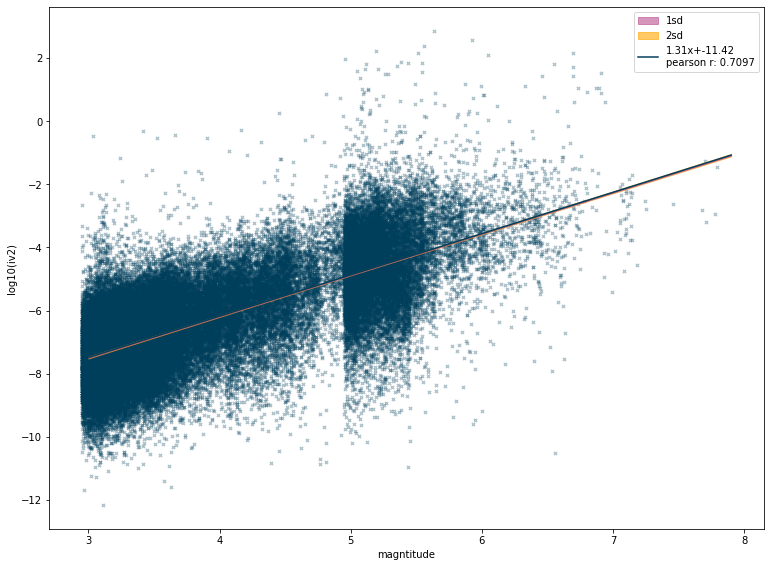

In [174]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))

x = np.array(df['mag'])-5
y = df['iv2']
x_unique = np.arange(-2,3,0.1)
mask = ~np.isnan(x) & ~np.isnan(y)
#axs.scatter(x, y,  c = df['dist'], cmap = 'viridis')
axs.scatter(x+np.random.uniform(-0.05, 0.05, len(x)), y, s = 10, c = '#003f5c', marker = 'x', alpha = 0.3)
result = scipy.stats.linregress(x[mask],y[mask])
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')

axs.plot(x_unique, a*x_unique+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
#plt.colorbar(label = 'distance') 
axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
axs.legend()
result_squared = result
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/all_data/iv2/'+title+'_r2.pdf', format = 'pdf')
#081839

#### using $r^{1.38}$

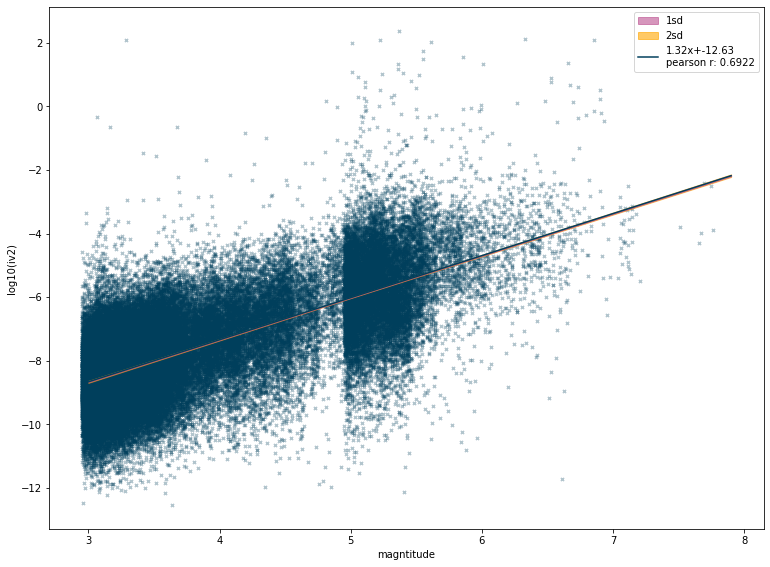

In [148]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))

x = np.array(df2['mag'])-5
y = df2['iv2']
mask = ~np.isnan(x) & ~np.isnan(y)
x_unique = np.arange(-2,3,0.1)
#axs.scatter(x, y,  c = df['dist'], cmap = 'viridis')
axs.scatter(x+np.random.uniform(-0.05, 0.05, len(x)), y, s = 10, c = '#003f5c', marker = 'x', alpha = 0.3)
result = scipy.stats.linregress(x[mask],y[mask])
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')

axs.plot(x_unique, a*x_unique+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
#plt.colorbar(label = 'distance') 
axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
axs.legend()
result_138 = result
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/all_data/iv2/'+title+'_r138.pdf', format = 'pdf')
#081839

### compare the results:

In [105]:
print(result_squared)
print(result_138)

LinregressResult(slope=1.3098947952121673, intercept=-4.8706677026106195, rvalue=0.7096849719161231, pvalue=0.0, stderr=0.004473612759880026, intercept_stderr=0.006430868571734031)
LinregressResult(slope=1.3224999794106889, intercept=-6.0162851797989925, rvalue=0.6921934474587618, pvalue=0.0, stderr=0.004743637352005014, intercept_stderr=0.006818953680778469)


#### previously 
$r^2: 1.26M-10.31$

pearson r = 0.6106 (r2 = 0.372832360)

$r^{1.38}: 1.20M-11.25$

pearson r = 0.5637 (r2 = 0.31775769)

#### now

$r^2: 1.31M-4.87$

pearson r = 0.7097 (r2 = 0.5036)

p = 0.0

$r^{1.38}: 1.32M-6.02$

pearson r = 0.6922 (r2 = 0.4791)

p = 0.0

*p value: The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.*


# predominant period

In [190]:
df = pd.read_pickle('/home/earthquakes1/homes/Rebecca/phd/data/results_database/eq_object_1s_bandpass_01_19_snr_20_blank_025_new')

In [191]:
list_tp_all = list(df.tp_max)
list_mag_all = list(df.eq_mag)
list_mag = []
list_tpmax = []
for m in range(0, len(list_mag_all)):
    list_mag.append([])
    list_tpmax.append([])
    for d in range(0, len(list_tp_all[m])):
        if list_tp_all[m][d] != None and list_tp_all[m][d]>0:
            list_mag[m].append(list_mag_all[m])
            list_tpmax[m].append(list_tp_all[m][d])

In [192]:
title = 'eq_object_1s_bandpass_01_19_snr_20_blank_025_new'

In [196]:
len(np.concatenate(list_tpmax))

39271

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc2/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2000 2000
plot saved


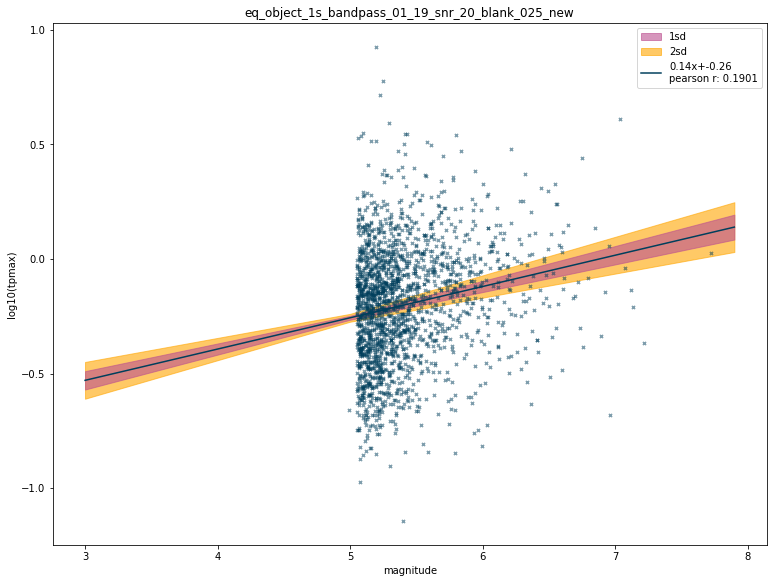

In [198]:
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['midnightblue']
#fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
x_aves_tp = []
count = 1
eq_count = 0
medians = [[] for _ in range(0, 45)]
medians_of_medians = [[] for _ in range(0, 45)]
n = 0
median_absolute_deviation = []
sum_absolute_deviation = []
all_abs_deviation = []
for n in [1]:#range(1, 10):#number of stations eq at least measured at
    med_for_ad = []
    mag_for_ad = []
    fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    for mag_lim in [5.]:#, 3.4, 4.0, 4.4]:#np.arange(3.0, 6.5, 0.1):
        y_aves_tp = []
        x_aves_tp = []
        for i  in range(0, len(list_mags)):
            if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
                #if list_mags[i] >= 4 and list_mags[i]<=5:
                if len(list_tpmax[i])>=n:
                    mean_tp = np.mean(list_tpmax[i]) 
                    std_tp = np.std(list_tpmax[i]) 
                    y_tp = [] 
                    for j in list_tpmax[i]: 
                        if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                            y_tp.append(math.log(j, 10))
                        elif len(list_tpmax[i])==1:
                            y_tp.append(math.log(j, 10))
                    x_tp = np.zeros(len(y_tp))  
                    x_tp = x_tp + list_mags[i]
                    c = 0
                    if len(x_tp)>0 and mag_lim == 5.:
                        if math.isnan(np.median(y_tp))==False:
                            axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 10, c = '#003f5c', marker = 'x', zorder =110, alpha = 0.5)
                    if math.isnan(np.median(y_tp))==False:  
                        y_aves_tp.append(np.median(y_tp))
                        x_aves_tp.append(list_mags[i])
        if len(y_aves_tp)>0:
            x_use = np.array(x_aves_tp) - 5
            y_use = np.array(y_aves_tp)

            print(len(x_aves_tp), len(y_aves_tp))
            count += 1
    x = x_use
    y = y_use
    x_unique = np.arange(-2,3,0.1)
    df = pd.DataFrame(columns = x_unique)

    result = scipy.stats.linregress(x,y)
    a = result.slope
    b = result.intercept
    std_a = result.stderr
    std_b = result.intercept_stderr

    y_1 = (a+std_a)*x_unique + (b+std_b)
    y_2 = (a+std_a)*x_unique + (b-std_b)
    y_3 = (a-std_a)*x_unique + (b+std_b)
    y_4 = (a-std_a)*x_unique + (b-std_b)


    y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

    y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
    y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
    y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
    y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

    y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

    #plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
    axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
    axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
    popt = np.polyfit(x, y, 1)
    axs.plot(x_unique, popt[0]*x_unique+popt[1], color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept,r=result.rvalue))
    axs.set_ylabel('log10(tpmax)')
    axs.set_xlabel('magnitude')   
    axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
    axs.legend()
    #axs.set_ylim([-2,1])
    axs.set_title(title)
    #plt.show()
    plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/all_data/tpmax/'+title+'_m5.pdf', format = 'pdf')
    print('plot saved')

# average period

## load data

In [185]:
df = pd.read_pickle('/home/earthquakes1/homes/Rebecca/phd/data/results_database/eq_object_1s_bandpass_01_19_snr_20_blank_025_new')

In [186]:
list_tc_all = list(df.tc)
list_mag_all = list(df.eq_mag)
list_mag = []
list_tc = []
for m in range(0, len(list_mag_all)):
    list_mag.append([])
    list_tc.append([])
    for d in range(0, len(list_tc_all[m])):
        if list_tc_all[m][d] != None and list_tc_all[m][d]>0:
            list_mag[m].append(list_mag_all[m])
            list_tc[m].append(list_tc_all[m][d])

In [187]:
title = 'eq_object_1s_bandpass_01_19_snr_20_blank_025_new'

In [189]:
len(list(np.concatenate(list_tc)))

111344

## plot data

7565 7565


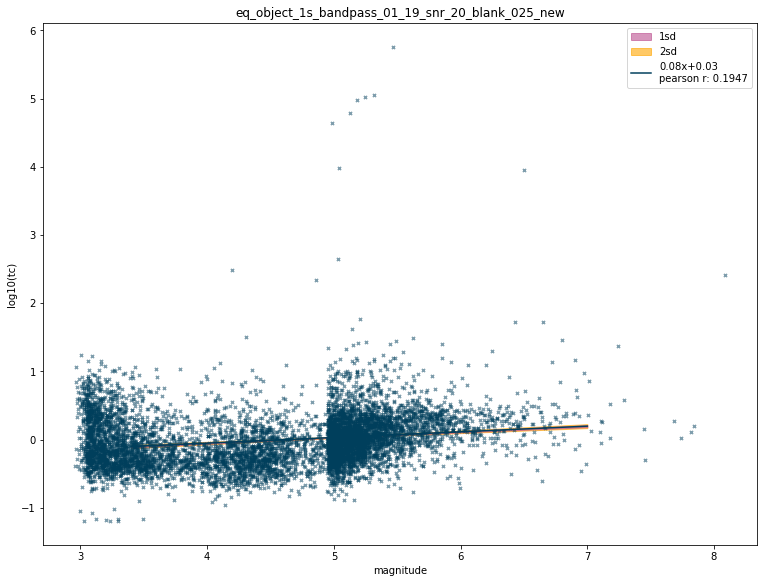

<Figure size 432x288 with 0 Axes>

In [136]:
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['midnightblue']
#fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tc = []
x_aves_tc = []
count = 1
eq_count = 0
n = 0
for n in [1]:#range(1, 10):#number of stations eq at least measured at
    med_for_ad = []
    mag_for_ad = []
    fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    for mag_lim in [3.]:#, 3.4, 4.0, 4.4]:#np.arange(3.0, 6.5, 0.1):
        y_aves_tc = []
        x_aves_tc = []
        for i  in range(0, len(list_mags)):
            if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
                #if list_mags[i] >= 4 and list_mags[i]<=5:
                if len(list_tc[i])>=n:
                    mean_tc = np.mean(list_tc[i]) 
                    std_tc = np.std(list_tc[i]) 
                    y_tc = [] 
                    for j in list_tc[i]: 
                        if j >= 0:
                            if j > mean_tc-2*std_tc and j < mean_tc + 2*std_tc:# and j < 100: 
                                y_tc.append(math.log(j, 10))
                            elif len(list_tc[i])==1:
                                y_tc.append(math.log(j, 10))
                    x_tc = np.zeros(len(y_tc))  
                    x_tc = x_tc + list_mags[i]
                    c = 0
                    if len(x_tc)>0 and mag_lim == 3:
                        if math.isnan(np.median(y_tc))==False:
                            axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tc), s = 10, c = '#003f5c', marker = 'x', zorder =110, alpha = 0.5)
                    if math.isnan(np.median(y_tc))==False:  
                        y_aves_tc.append(np.median(y_tc))
                        x_aves_tc.append(list_mags[i])
        if len(y_aves_tc)>0:
            x_use = np.array(x_aves_tc) - 5
            y_use = np.array(y_aves_tc)

            print(len(x_aves_tc), len(y_aves_tc))
            count += 1
    x = x_use
    y = y_use
    x_unique = np.arange(-1.6,2.1,0.1)
    df = pd.DataFrame(columns = x_unique)

    result = scipy.stats.linregress(x,y)
    a = result.slope
    b = result.intercept
    std_a = result.stderr
    std_b = result.intercept_stderr

    y_1 = (a+std_a)*x_unique + (b+std_b)
    y_2 = (a+std_a)*x_unique + (b-std_b)
    y_3 = (a-std_a)*x_unique + (b+std_b)
    y_4 = (a-std_a)*x_unique + (b-std_b)


    y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

    y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
    y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
    y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
    y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

    y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

    #plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
    axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
    axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
    popt = np.polyfit(x, y, 1)
    axs.plot(x_unique, popt[0]*x_unique+popt[1], color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept,r=result.rvalue))
    axs.set_ylabel('log10(tc)')
    axs.set_xlabel('magnitude')   
    axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
    axs.legend()
    #axs.set_ylim([-2,1])
    axs.set_title(title)
    plt.show()
    plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/all_data/tc/'+title+'_m3.pdf', format = 'pdf')
    

2743 2743


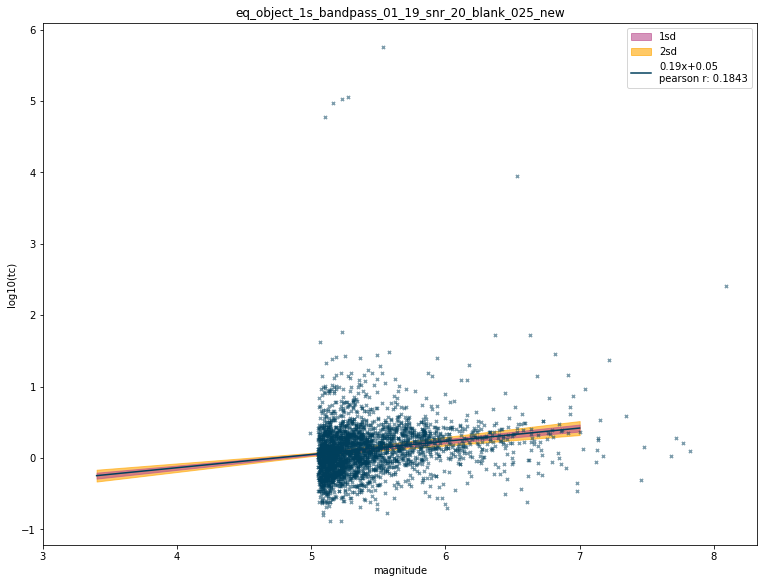

<Figure size 432x288 with 0 Axes>

In [135]:
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['midnightblue']
#fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tc = []
x_aves_tc = []
count = 1
eq_count = 0
n = 0
for n in [1]:#range(1, 10):#number of stations eq at least measured at
    med_for_ad = []
    mag_for_ad = []
    fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    for mag_lim in [5.]:#, 3.4, 4.0, 4.4]:#np.arange(3.0, 6.5, 0.1):
        y_aves_tc = []
        x_aves_tc = []
        for i  in range(0, len(list_mags)):
            if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
                #if list_mags[i] >= 4 and list_mags[i]<=5:
                if len(list_tc[i])>=n:
                    mean_tc = np.mean(list_tc[i]) 
                    std_tc = np.std(list_tc[i]) 
                    y_tc = [] 
                    for j in list_tc[i]: 
                        if j >= 0:
                            if j > mean_tc-2*std_tc and j < mean_tc + 2*std_tc:# and j < 100: 
                                y_tc.append(math.log(j, 10))
                            elif len(list_tc[i])==1:
                                y_tc.append(math.log(j, 10))
                    x_tc = np.zeros(len(y_tc))  
                    x_tc = x_tc + list_mags[i]
                    c = 0
                    if len(x_tc)>0 and mag_lim == 5:
                        if math.isnan(np.median(y_tc))==False:
                            axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tc), s = 10, c = '#003f5c', marker = 'x', zorder =110, alpha = 0.5)
                    if math.isnan(np.median(y_tc))==False:  
                        y_aves_tc.append(np.median(y_tc))
                        x_aves_tc.append(list_mags[i])
        if len(y_aves_tc)>0:
            x_use = np.array(x_aves_tc) - 5
            y_use = np.array(y_aves_tc)

            print(len(x_aves_tc), len(y_aves_tc))
            count += 1
    x = x_use
    y = y_use
    x_unique = np.arange(-1.6,2.1,0.1)
    df = pd.DataFrame(columns = x_unique)

    result = scipy.stats.linregress(x,y)
    a = result.slope
    b = result.intercept
    std_a = result.stderr
    std_b = result.intercept_stderr

    y_1 = (a+std_a)*x_unique + (b+std_b)
    y_2 = (a+std_a)*x_unique + (b-std_b)
    y_3 = (a-std_a)*x_unique + (b+std_b)
    y_4 = (a-std_a)*x_unique + (b-std_b)


    y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

    y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
    y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
    y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
    y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

    y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
    y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

    #plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
    axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
    axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
    popt = np.polyfit(x, y, 1)
    axs.plot(x_unique, popt[0]*x_unique+popt[1], color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept,r=result.rvalue))
    axs.set_ylabel('log10(tc)')
    axs.set_xlabel('magnitude')   
    axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
    axs.legend()
    #axs.set_ylim([-2,1])
    axs.set_title(title)
    plt.show()
    plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/all_data/tc/'+title+'_m5.pdf', format = 'pdf')